In [1]:
import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
file = 'data-test-analytics.csv'

df = pd.read_csv(file)

In [ ]:
explain = {
    "id" : "Identificação do cliente",
    "created_at" : "Data de criação da assinatura",
    "updated_at" : "Data da última modificação da assinatura",
    "deleted_at" : "Data de cancelamento da assinatura",
    "name_hash" : "Nome do usuário (criptografado)",
    "email_hash" : "Email (criptografado)",
    "address_hash" : "Endereço (criptografado)",
    "birth_date" : "Data de aniversário do cliente",
    "status" : "Status da assinatura",
    "version" : "Versão da assinatura",
    "city" : "Cidade do cliente",
    "state" : "Estado do cliente",
    "neighborhood" : "Bairro do cliente",
    "last_date_purchase" : "Data do último pedido que ocorreu pela assinatura",
    "average_ticket" : "Média de gasto por pedido",
    "items_quantity" : "Média de itens na assinatura",
    "all_revenue" : "Total de receita realizado pelo cliente",
    "all_orders" : "Total de pedidos realizado pelo cliente",
    "recency" : "Tempo desde a última compra do cliente",
    "marketing_source" : "Canal de marketing que converteu a assinatura"    
}

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   created_at          10000 non-null  object 
 2   updated_at          10000 non-null  object 
 3   deleted_at          505 non-null    object 
 4   name_hash           10000 non-null  object 
 5   email_hash          10000 non-null  object 
 6   address_hash        10000 non-null  object 
 7   birth_date          10000 non-null  object 
 8   status              10000 non-null  object 
 9   version             10000 non-null  object 
 10  city                10000 non-null  object 
 11  state               10000 non-null  object 
 12  neighborhood        10000 non-null  object 
 13  last_date_purchase  10000 non-null  object 
 14  average_ticket      10000 non-null  float64
 15  items_quantity      10000 non-null  int64  
 16  all_r

In [4]:
df.head(3)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search


Tomando como Churn as pessoas que cancelaram suas assinaturas. Clientes com a assinatura pausada serão analisado depois.

In [5]:
# numeros de dados
df.shape

(10000, 20)

In [6]:
df_config = df.copy()

In [7]:
churn = []
for i in df['status'].tolist():
    if(i == 'canceled'):
        churn.append('Yes')
    else:
        churn.append('No')
df_config['Churn'] = churn

In [23]:
text_label = LabelEncoder()
df_config['Churn'] = text_label.fit_transform(df_config.Churn)

In [30]:
df_config.head(1)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,...,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,Churn
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,...,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm,0


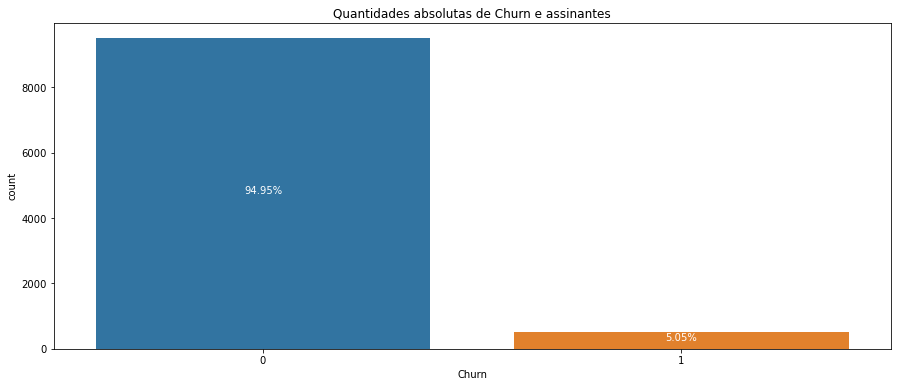

In [333]:
total=len(df_config)
fig, ax = plt.subplots(figsize = (15,6))
g=sns.countplot(data = df_config, x='Churn')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.2f}%'.format(100*height/total),
            ha="center", color='white')
plt.title('Quantidades absolutas de Churn e assinantes')
plt.savefig('graphs/quantidade_de_churn.png')
plt.show()


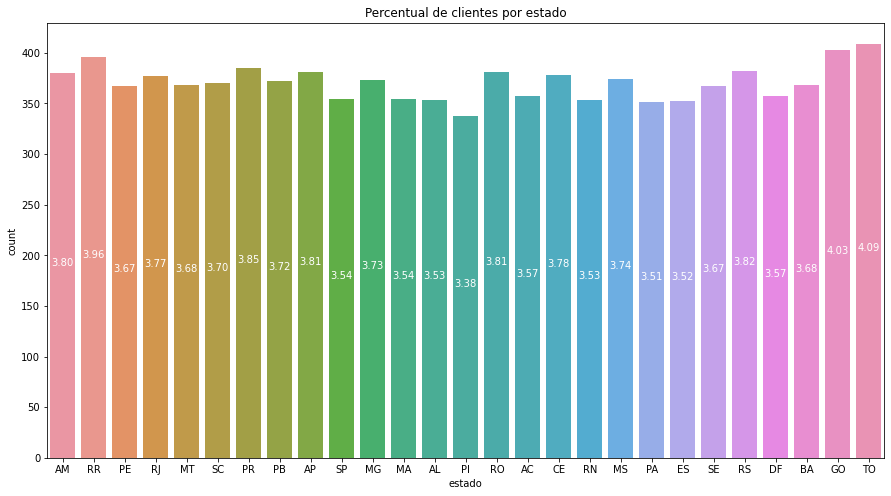

In [50]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.countplot(x = df_config.state, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.2f}'.format(100*height/total),
            ha="center", color='white')
plt.xlabel('estado')
plt.title('Percentual de clientes por estado')
plt.show()

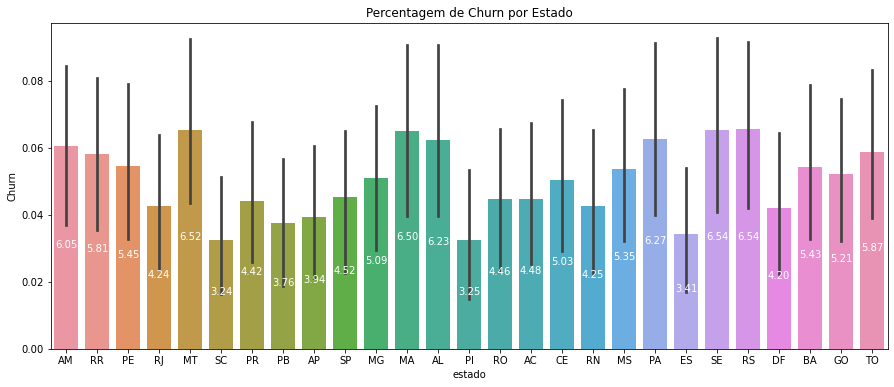

In [334]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(x = df_config.state,y = df_config.Churn , ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.2f}'.format(100*height),
            ha="center", color='white')
plt.xlabel('estado')
plt.title('Percentagem de Churn por Estado')
plt.savefig('graphs/percentagem_de_churn_por_estado.png')
plt.show()

A quantidade de Churn por estado é diversa. Porêm não podemos observar "outliers" expressivos

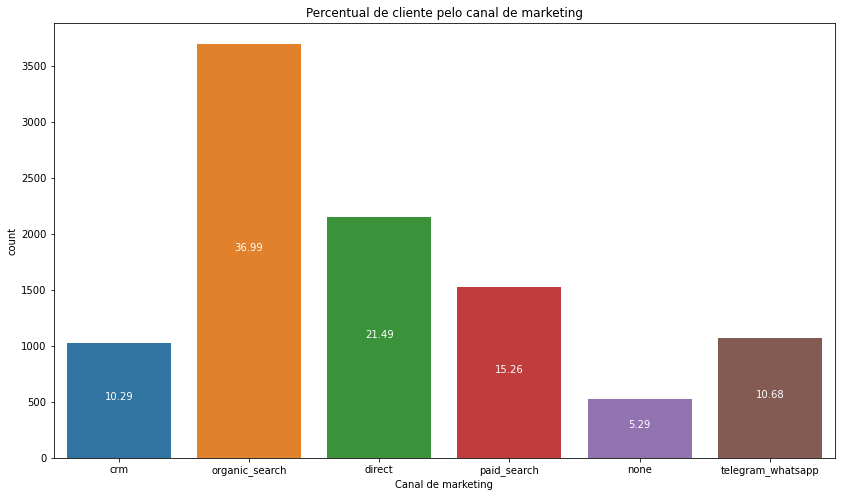

In [335]:
fig, ax = plt.subplots(figsize=(14,8))
g = sns.countplot(x = df_config.marketing_source, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.2f}'.format(100*height/total),
            ha="center", color='white')
plt.xlabel('Canal de marketing')
plt.title('Percentual de cliente pelo canal de marketing')
plt.savefig('graphs/percentual_de_cliente_canal_marketing')
plt.show()

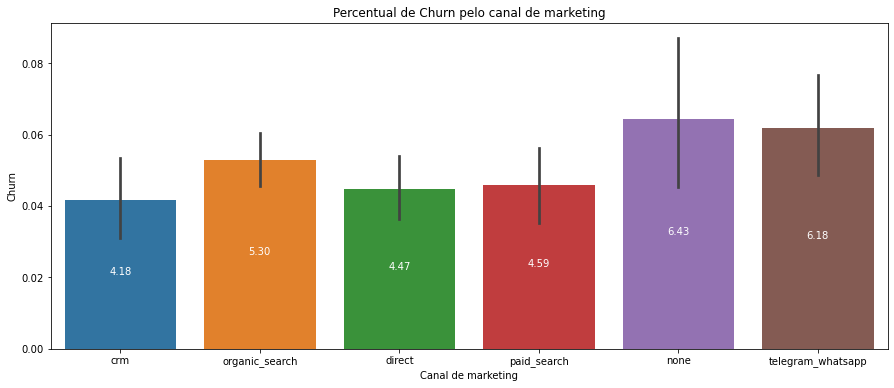

In [337]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(x = df_config.marketing_source,y = df_config.Churn , ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.2f}'.format(100*height),
            ha="center", color='white')
plt.xlabel('Canal de marketing')
plt.title('Percentual de Churn pelo canal de marketing')
plt.savefig('graphs/percentualde_churn_de_cliente_canal_marketing')
plt.show()

Embora a fonte de mercado possui a menor quantidade de clientes, é nela que se encontra o maior percentual de Churn

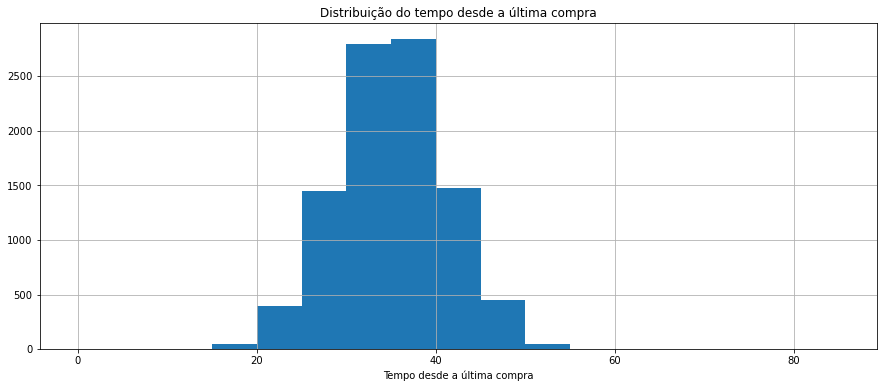

In [338]:
#fig, ax = plt.subplots(figsize=(15, 6))
# sns.distplot(df.MonthlyCharges, ax=ax)
plt.figure(figsize = (15,6))
df_config.recency.hist(bins=range(0,90,5))
plt.xlabel('Tempo desde a última compra')
plt.title('Distribuição do tempo desde a última compra')
plt.savefig('graphs/tempo_medio_entre_compras.png')
plt.show()


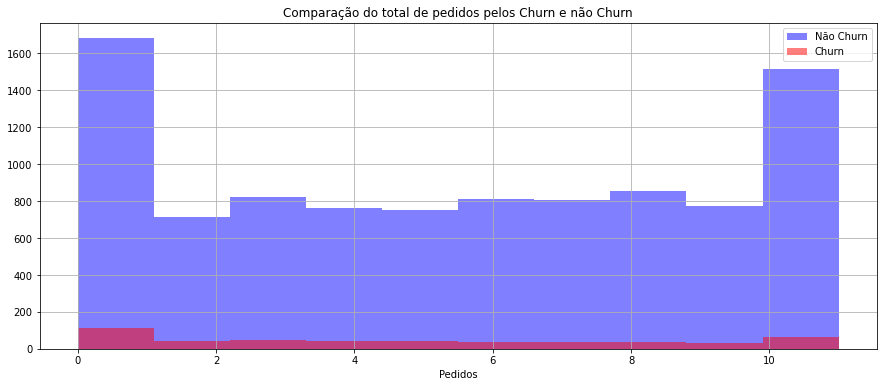

In [339]:
fig, ax = plt.subplots(figsize=(15, 6))
df_config[df_config.Churn == 0]['all_orders'].hist(bins=10, color="blue", alpha=0.5, ax=ax, label = 'Não Churn')
df_config[df_config.Churn == 1]['all_orders'].hist(bins=10, color="red", alpha=0.5, ax=ax, label = 'Churn')
plt.title('Comparação do total de pedidos pelos Churn e não Churn')
plt.xlabel('Pedidos')
plt.legend()
plt.savefig('graphs/comparacao_total_pedidos.png')
plt.show()

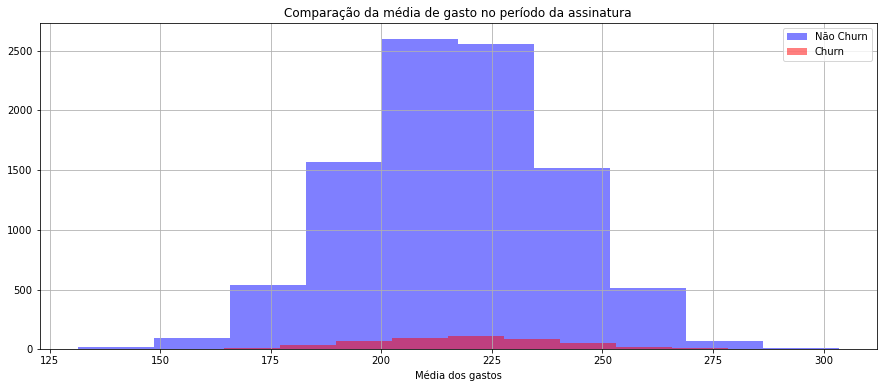

In [340]:
fig, ax = plt.subplots(figsize=(15, 6))
df_config[df_config.Churn == 0]['average_ticket'].hist(bins=10, color="blue", alpha=0.5, ax=ax, label = 'Não Churn')
df_config[df_config.Churn == 1]['average_ticket'].hist(bins=10, color="red", alpha=0.5, ax=ax, label = 'Churn')
plt.title('Comparação da média de gasto no período da assinatura')
plt.xlabel('Média dos gastos')
plt.legend()
plt.savefig('graphs/comparacao_gasto_medio.png')
plt.show()

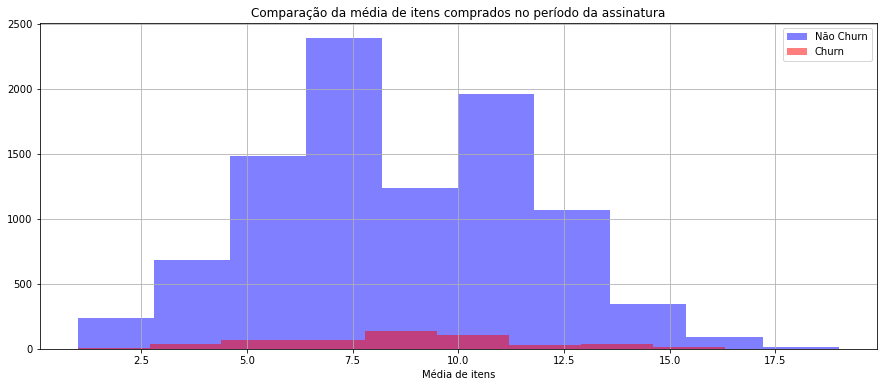

In [341]:
fig, ax = plt.subplots(figsize=(15, 6))
df_config[df_config.Churn == 0]['items_quantity'].hist(bins=10, color="blue", alpha=0.5, ax=ax, label = 'Não Churn')
df_config[df_config.Churn == 1]['items_quantity'].hist(bins=10, color="red", alpha=0.5, ax=ax, label = 'Churn')
plt.title('Comparação da média de itens comprados no período da assinatura')
plt.xlabel('Média de itens')
plt.legend()
plt.savefig('graphs/comparacao_itens_comprados_medio.png')
plt.show()

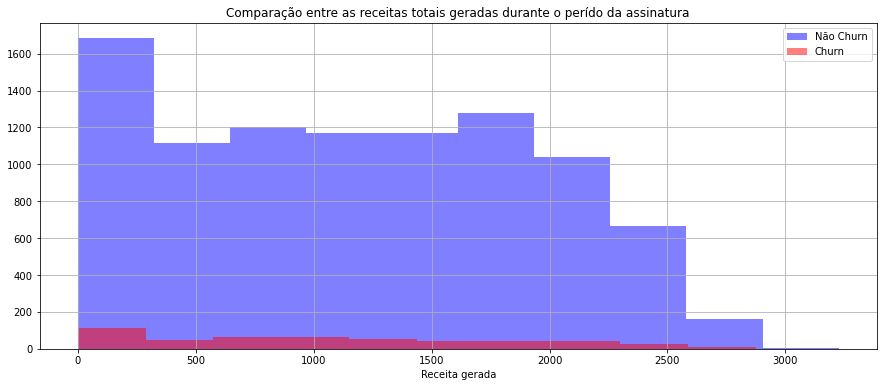

In [342]:
fig, ax = plt.subplots(figsize=(15, 6))
df_config[df_config.Churn == 0]['all_revenue'].hist(bins=10, color="blue", alpha=0.5, ax=ax, label = 'Não Churn')
df_config[df_config.Churn == 1]['all_revenue'].hist(bins=10, color="red", alpha=0.5, ax=ax, label = 'Churn')
plt.title('Comparação entre as receitas totais geradas durante o perído da assinatura')
plt.xlabel('Receita gerada')
plt.legend()
plt.savefig('graphs/comparacao_receita_gerada.png')
plt.show()

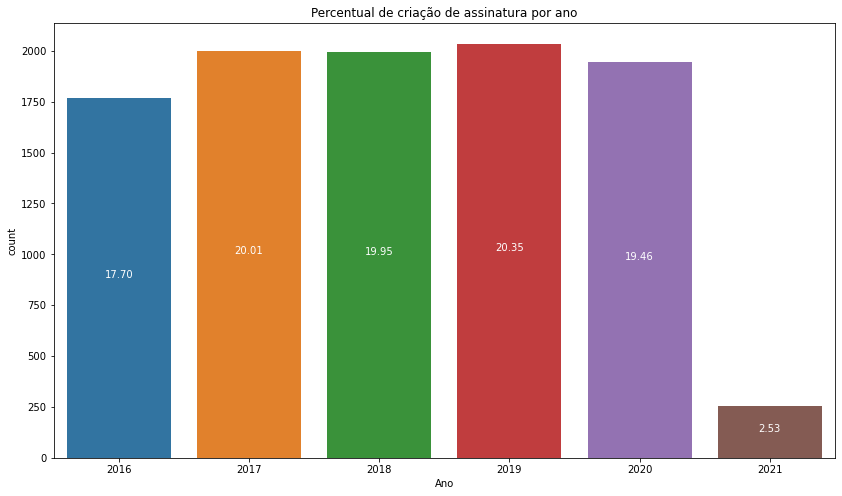

In [343]:
fig, ax = plt.subplots(figsize=(14,8))
g = sns.countplot(x = pd.DatetimeIndex(df_config.created_at).year, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.2f}'.format(100*height/total),
            ha="center", color='white')
plt.xlabel('Ano')
plt.title('Percentual de criação de assinatura por ano')
plt.savefig('graphs/percentual_assinaturas_geradas_ano.png')
plt.show()

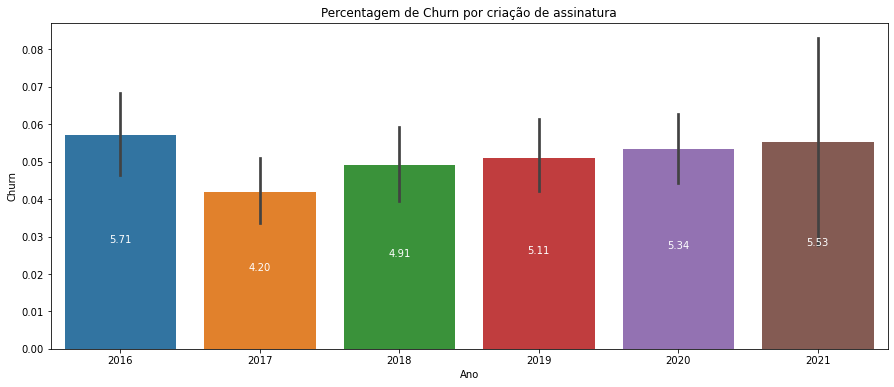

In [344]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(x = pd.DatetimeIndex(df_config.created_at).year,y = df_config.Churn , ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.2f}'.format(100*height),
            ha="center", color='white')
plt.xlabel('Ano')
plt.title('Percentagem de Churn por criação de assinatura')
plt.savefig('percentagem_churn_por_assinatura_ano.png')
plt.show()

In [239]:
#calculado idade dos clientes
corrigindo_ano_nascimento = []
for i in pd.DatetimeIndex(df_config['birth_date']).year:
    if i > 2000:
        corrigindo_ano_nascimento.append(i - 100)
    else:
        corrigindo_ano_nascimento.append(i)

In [251]:
df_config['idade'] = np.array([2020 for i in corrigindo_ano_nascimento]) - np.array(corrigindo_ano_nascimento)

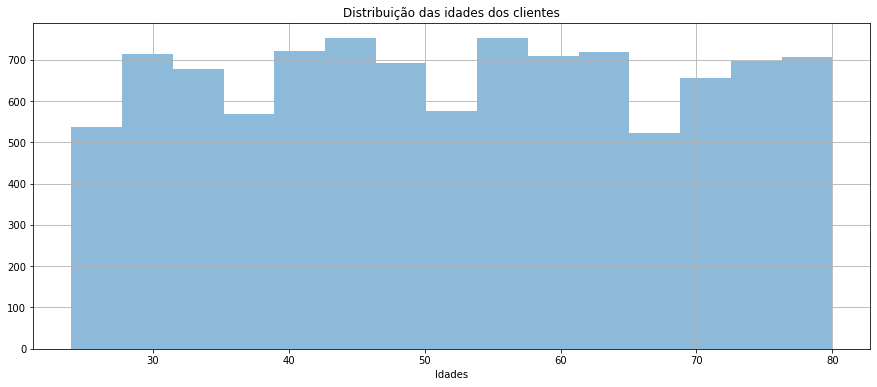

In [268]:
fig, ax = plt.subplots(figsize=(15, 6))
df_config.idade.hist(bins=15, alpha=0.5, ax=ax)
plt.xlabel('Idades')
plt.title('Distribuição das idades dos clientes')
plt.show()

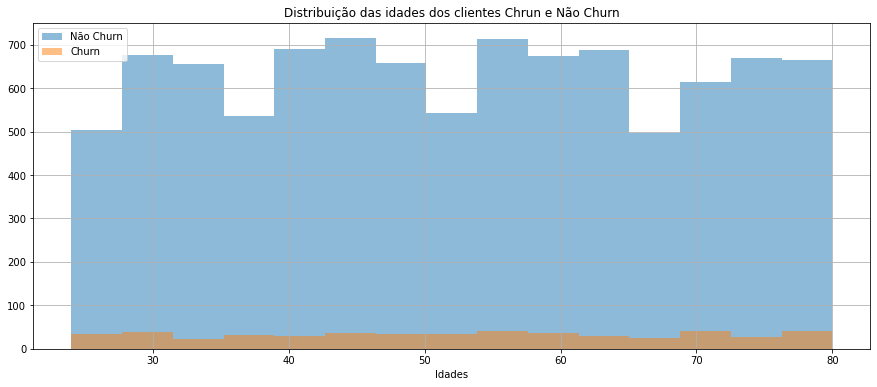

In [345]:
fig, ax = plt.subplots(figsize=(15, 6))
df_config[df_config['Churn'] == 0].idade.hist(bins=15, alpha=0.5, ax=ax, label = 'Não Churn')
df_config[df_config['Churn'] == 1].idade.hist(bins=15, alpha=0.5, ax=ax, label = 'Churn')
plt.xlabel('Idades')
plt.title('Distribuição das idades dos clientes Chrun e Não Churn')
plt.legend()
plt.savefig('graphs/comparacao_idade_churn_nchurn.png')
plt.show()

A distribuição de idade dos clientes que cancelaram sua assinatura é bem distribuida. Não apresentando um grupo específico

In [295]:
df_config['created_at'] = pd.to_datetime(df_config['created_at'])
df_config['deleted_at'] = pd.to_datetime(df_config['deleted_at'])
df_config['updated_at'] = pd.to_datetime(df_config['updated_at'])
df_config['last_date_purchase'] = pd.to_datetime(df_config['last_date_purchase'])

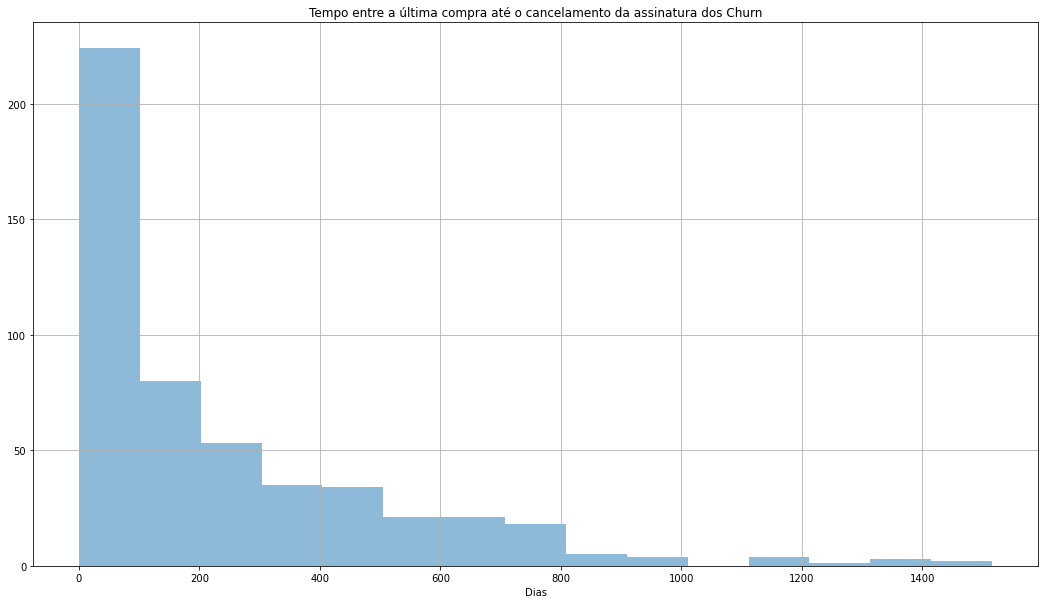

In [346]:
plt.figure(figsize=(18,10))
(df_config[df_config['Churn'] == 1]['deleted_at'] - df_config[df_config['Churn'] == 1]['last_date_purchase']).dt.days.hist(bins=15, alpha=0.5)
plt.title('Tempo entre a última compra até o cancelamento da assinatura dos Churn')
plt.xlabel('Dias')
plt.savefig('graphs/perido_entre_ultima_compra_cancelamento.png')
plt.show()

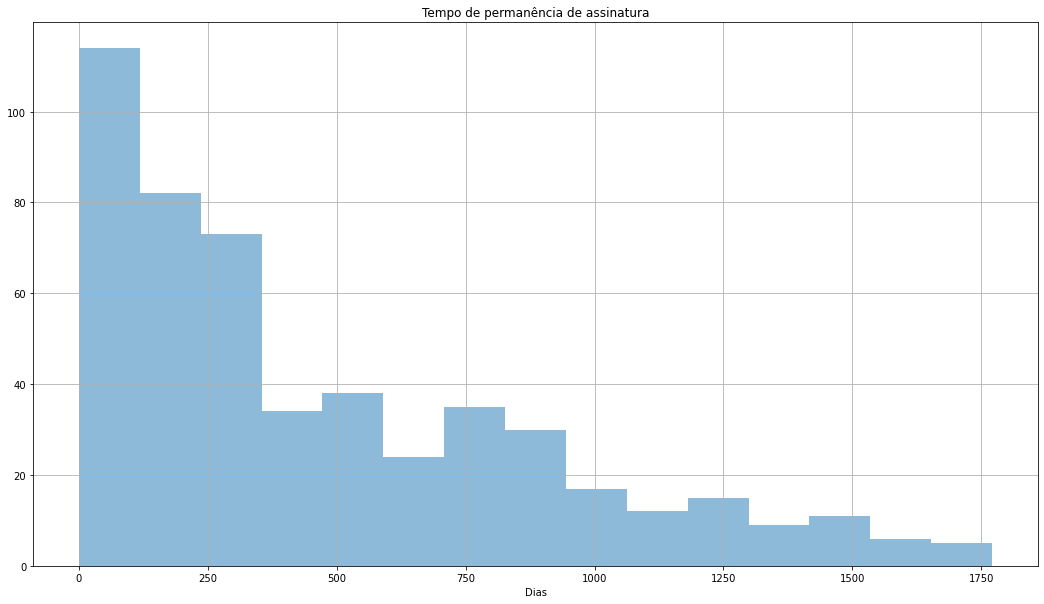

In [347]:
plt.figure(figsize=(18,10))
(df_config[df_config['Churn'] == 1]['deleted_at'] - df_config[df_config['Churn'] == 1]['created_at']).dt.days.hist(bins=15, alpha=0.5)
plt.title('Tempo de permanência de assinatura')
plt.xlabel('Dias')
plt.savefig('graphs/perido_de_permanencia.png')
plt.show()